In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from lib_file import lib_path

In [2]:
df = pd.read_csv("dataset/final_dataset.csv")

In [3]:
df.shape

(90000, 78)

In [4]:
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,11207,182,0,80080.0,0.0,440.0,440.0,440.00000,0.000000,0.0,0.0,0.0,0.0,7.145534e+06,16239.850094,61.917126,361.853150,4006.0,0.0,11207.0,61.917126,361.853150,4006.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,16239.850,0.0,440.0,440.0,440.00000,0.000000,0.0000,0,0,0,0,0,0,0,0,0.0,442.41757,440.00000,0.0,0,0,0,0,0,0,182,80080,0,0,-1,-1,181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_NTP
1,17,211,58,0,25376.0,0.0,440.0,368.0,437.51724,13.252264,0.0,0.0,0.0,0.0,1.202654e+08,274881.516588,3.701754,10.356097,43.0,0.0,211.0,3.701754,10.356097,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1160,0,274881.530,0.0,368.0,440.0,437.55933,13.141500,172.6990,0,0,0,0,0,0,0,0,0.0,445.10345,437.51724,0.0,0,0,0,0,0,0,58,25376,0,0,-1,-1,57,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_NTP
2,17,751,86,0,37408.0,0.0,440.0,224.0,434.97675,32.745354,0.0,0.0,0.0,0.0,4.981092e+07,114513.981358,8.835294,16.579424,49.0,0.0,751.0,8.835294,16.579424,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1720,0,114513.984,0.0,224.0,440.0,435.03450,32.558872,1060.0802,0,0,0,0,0,0,0,0,0.0,440.09302,434.97675,0.0,0,0,0,0,0,0,86,37408,0,0,-1,-1,85,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_NTP
3,17,1064,100,0,44000.0,0.0,440.0,440.0,440.00000,0.000000,0.0,0.0,0.0,0.0,4.135338e+07,93984.962406,10.747475,20.950546,97.0,0.0,1064.0,10.747475,20.950546,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,800,0,93984.960,0.0,440.0,440.0,440.00000,0.000000,0.0000,0,0,0,0,0,0,0,0,0.0,444.40000,440.00000,0.0,0,0,0,0,0,0,100,44000,0,0,-1,-1,99,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_NTP
4,17,807,26,0,11440.0,0.0,440.0,440.0,440.00000,0.000000,0.0,0.0,0.0,0.0,1.417596e+07,32218.091698,32.280000,34.532013,110.0,1.0,807.0,32.280000,34.532013,110.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,520,0,32218.092,0.0,440.0,440.0,440.00000,0.000000,0.0000,0,0,0,0,0,0,0,0,0.0,456.92307,440.00000,0.0,0,0,0,0,0,0,26,11440,0,0,-1,-1,25,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DrDoS_NTP


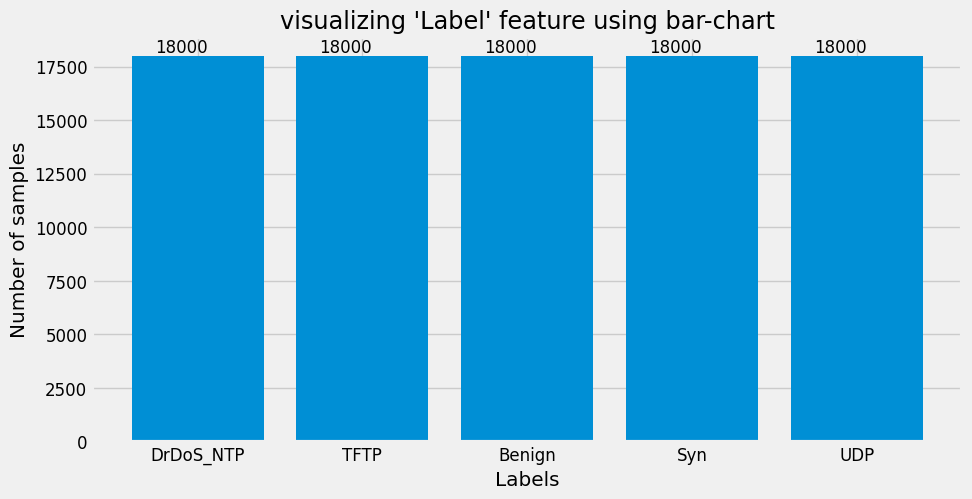

In [5]:
chart_df = dict(df['Label'].value_counts())
with plt.style.context(style='fivethirtyeight'):
    plt.figure(figsize=(10,5))
    plt.rcParams['font.size'] = 12
    barchart_object = plt.bar(
        x=list(chart_df.keys()),
        height=list(chart_df.values())
    )
    plt.title(label="visualizing 'Label' feature using bar-chart")
    plt.xlabel(xlabel='Labels')
    plt.ylabel(ylabel='Number of samples')
    for bar, count in zip(barchart_object, list(chart_df.values())):
        plt.text(
            x=bar.get_x() + bar.get_width() / 2 - 0.1,
            y=bar.get_height() + 0.1,
            s=str(count),
            ha='center',
            va='bottom'
        )
    plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Protocol                  90000 non-null  int64  
 1   Flow Duration             90000 non-null  int64  
 2   Total Fwd Packets         90000 non-null  int64  
 3   Total Backward Packets    90000 non-null  int64  
 4   Fwd Packets Length Total  90000 non-null  float64
 5   Bwd Packets Length Total  90000 non-null  float64
 6   Fwd Packet Length Max     90000 non-null  float64
 7   Fwd Packet Length Min     90000 non-null  float64
 8   Fwd Packet Length Mean    90000 non-null  float64
 9   Fwd Packet Length Std     90000 non-null  float64
 10  Bwd Packet Length Max     90000 non-null  float64
 11  Bwd Packet Length Min     90000 non-null  float64
 12  Bwd Packet Length Mean    90000 non-null  float64
 13  Bwd Packet Length Std     90000 non-null  float64
 14  Flow B

In [7]:
class_labels = df['Label'].unique().tolist()
class_labels.sort()

print(class_labels)

['Benign', 'DrDoS_NTP', 'Syn', 'TFTP', 'UDP']


In [8]:
class_dict = {}
for idx, label in enumerate(class_labels):
    class_dict[label] = idx

print(class_dict)

{'Benign': 0, 'DrDoS_NTP': 1, 'Syn': 2, 'TFTP': 3, 'UDP': 4}


In [9]:
df['Label'] = df['Label'].map(class_dict)

df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,11207,182,0,80080.0,0.0,440.0,440.0,440.00000,0.000000,0.0,0.0,0.0,0.0,7.145534e+06,16239.850094,61.917126,361.853150,4006.0,0.0,11207.0,61.917126,361.853150,4006.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,16239.850,0.0,440.0,440.0,440.00000,0.000000,0.0000,0,0,0,0,0,0,0,0,0.0,442.41757,440.00000,0.0,0,0,0,0,0,0,182,80080,0,0,-1,-1,181,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,17,211,58,0,25376.0,0.0,440.0,368.0,437.51724,13.252264,0.0,0.0,0.0,0.0,1.202654e+08,274881.516588,3.701754,10.356097,43.0,0.0,211.0,3.701754,10.356097,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1160,0,274881.530,0.0,368.0,440.0,437.55933,13.141500,172.6990,0,0,0,0,0,0,0,0,0.0,445.10345,437.51724,0.0,0,0,0,0,0,0,58,25376,0,0,-1,-1,57,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,17,751,86,0,37408.0,0.0,440.0,224.0,434.97675,32.745354,0.0,0.0,0.0,0.0,4.981092e+07,114513.981358,8.835294,16.579424,49.0,0.0,751.0,8.835294,16.579424,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1720,0,114513.984,0.0,224.0,440.0,435.03450,32.558872,1060.0802,0,0,0,0,0,0,0,0,0.0,440.09302,434.97675,0.0,0,0,0,0,0,0,86,37408,0,0,-1,-1,85,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,17,1064,100,0,44000.0,0.0,440.0,440.0,440.00000,0.000000,0.0,0.0,0.0,0.0,4.135338e+07,93984.962406,10.747475,20.950546,97.0,0.0,1064.0,10.747475,20.950546,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,800,0,93984.960,0.0,440.0,440.0,440.00000,0.000000,0.0000,0,0,0,0,0,0,0,0,0.0,444.40000,440.00000,0.0,0,0,0,0,0,0,100,44000,0,0,-1,-1,99,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,17,807,26,0,11440.0,0.0,440.0,440.0,440.00000,0.000000,0.0,0.0,0.0,0.0,1.417596e+07,32218.091698,32.280000,34.532013,110.0,1.0,807.0,32.280000,34.532013,110.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,520,0,32218.092,0.0,440.0,440.0,440.00000,0.000000,0.0000,0,0,0,0,0,0,0,0,0.0,456.92307,440.00000,0.0,0,0,0,0,0,0,26,11440,0,0,-1,-1,25,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [10]:
df = df.sample(frac=1).reset_index(drop=True)

df.head(10)

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,108937,4,0,1398.0,0.0,369.0,330.0,349.5,22.516660,0.0,0.0,0.0,0.0,1.283311e+04,36.718470,3.631233e+04,6.285238e+04,108888.0,1.0,108937.0,3.631233e+04,6.285238e+04,108888.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,80,0,36.718470,0.000000,330.0,369.0,345.60000,21.361180,456.3000,0,0,0,0,0,0,0,0,0.0,432.000000,349.5,0.0,0,0,0,0,0,0,4,1398,0,0,-1,-1,3,20,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,4
1,17,2998434,4,0,2064.0,0.0,516.0,516.0,516.0,0.000000,0.0,0.0,0.0,0.0,6.883593e+02,1.334030,9.994780e+05,1.731146e+06,2998433.0,0.0,2998434.0,9.994780e+05,1.731146e+06,2998433.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,80,0,1.334030,0.000000,516.0,516.0,516.00000,0.000000,0.0000,0,0,0,0,0,0,0,0,0.0,645.000000,516.0,0.0,0,0,0,0,0,0,4,2064,0,0,-1,-1,3,20,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,3
2,17,3005015,4,0,2064.0,0.0,516.0,516.0,516.0,0.000000,0.0,0.0,0.0,0.0,6.868518e+02,1.331108,1.001672e+06,1.734944e+06,3005012.0,1.0,3005015.0,1.001672e+06,1.734944e+06,3005012.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,1.331108,0.000000,516.0,516.0,516.00000,0.000000,0.0000,0,0,0,0,0,0,0,0,0.0,645.000000,516.0,0.0,0,0,0,0,0,0,4,2064,0,0,-1,-1,3,-1,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,3
3,17,942,18,0,7920.0,0.0,440.0,440.0,440.0,0.000000,0.0,0.0,0.0,0.0,8.407643e+06,19108.280255,5.541177e+01,7.773759e+01,256.0,0.0,942.0,5.541177e+01,7.773759e+01,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-18,0,19108.280000,0.000000,440.0,440.0,440.00000,0.000000,0.0000,0,0,0,0,0,0,0,0,0.0,464.444460,440.0,0.0,0,0,0,0,0,0,18,7920,0,0,-1,-1,17,-1,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,6,59833134,10,4,60.0,24.0,6.0,6.0,6.0,0.000000,6.0,6.0,6.0,0.0,1.403904e+00,0.233984,4.602549e+06,7.548023e+06,21785732.0,1.0,59833136.0,6.648126e+06,8.376194e+06,21785838.0,1.0,13709210.0,4569736.5,7915013.5,13709207.0,1.0,0,0,0,0,200,80,0.167131,0.066853,6.0,6.0,6.00000,0.000000,0.0000,0,0,0,0,1,0,0,0,0.0,6.428571,6.0,6.0,0,0,0,0,0,0,10,60,4,24,5840,0,9,20,45.25,53.05579,107.0,1.0,14958227.0,4621059.0,21785732.0,11763907.0,2
5,17,218559,6,0,2088.0,0.0,393.0,321.0,348.0,35.088460,0.0,0.0,0.0,0.0,9.553484e+03,27.452541,4.371180e+04,5.987712e+04,111680.0,1.0,218559.0,4.371180e+04,5.987712e+04,111680.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,120,0,27.452541,0.000000,321.0,393.0,344.14285,33.617596,1130.1428,0,0,0,0,0,0,0,0,0.0,401.500000,348.0,0.0,0,0,0,0,0,0,6,2088,0,0,-1,-1,5,8,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,4
6,17,109514,4,0,1438.0,0.0,389.0,330.0,359.5,34.063667,0.0,0.0,0.0,0.0,1.313074e+04,36.525011,3.650467e+04,6.318377e+04,109463.0,2.0,109514.0,3.650467e+04,6.318377e+04,109463.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,80,0,36.525010,0.000000,330.0,389.0,353.60000,32.315630,1044.3000,0,0,0,0,0,0,0,0,0.0,442.000000,359.5,0.0,0,0,0,0,0,0,4,1438,0,0,-1,-1,3,20,0.00,0.00000,0.0,0.0,0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Protocol                  90000 non-null  int64  
 1   Flow Duration             90000 non-null  int64  
 2   Total Fwd Packets         90000 non-null  int64  
 3   Total Backward Packets    90000 non-null  int64  
 4   Fwd Packets Length Total  90000 non-null  float64
 5   Bwd Packets Length Total  90000 non-null  float64
 6   Fwd Packet Length Max     90000 non-null  float64
 7   Fwd Packet Length Min     90000 non-null  float64
 8   Fwd Packet Length Mean    90000 non-null  float64
 9   Fwd Packet Length Std     90000 non-null  float64
 10  Bwd Packet Length Max     90000 non-null  float64
 11  Bwd Packet Length Min     90000 non-null  float64
 12  Bwd Packet Length Mean    90000 non-null  float64
 13  Bwd Packet Length Std     90000 non-null  float64
 14  Flow B

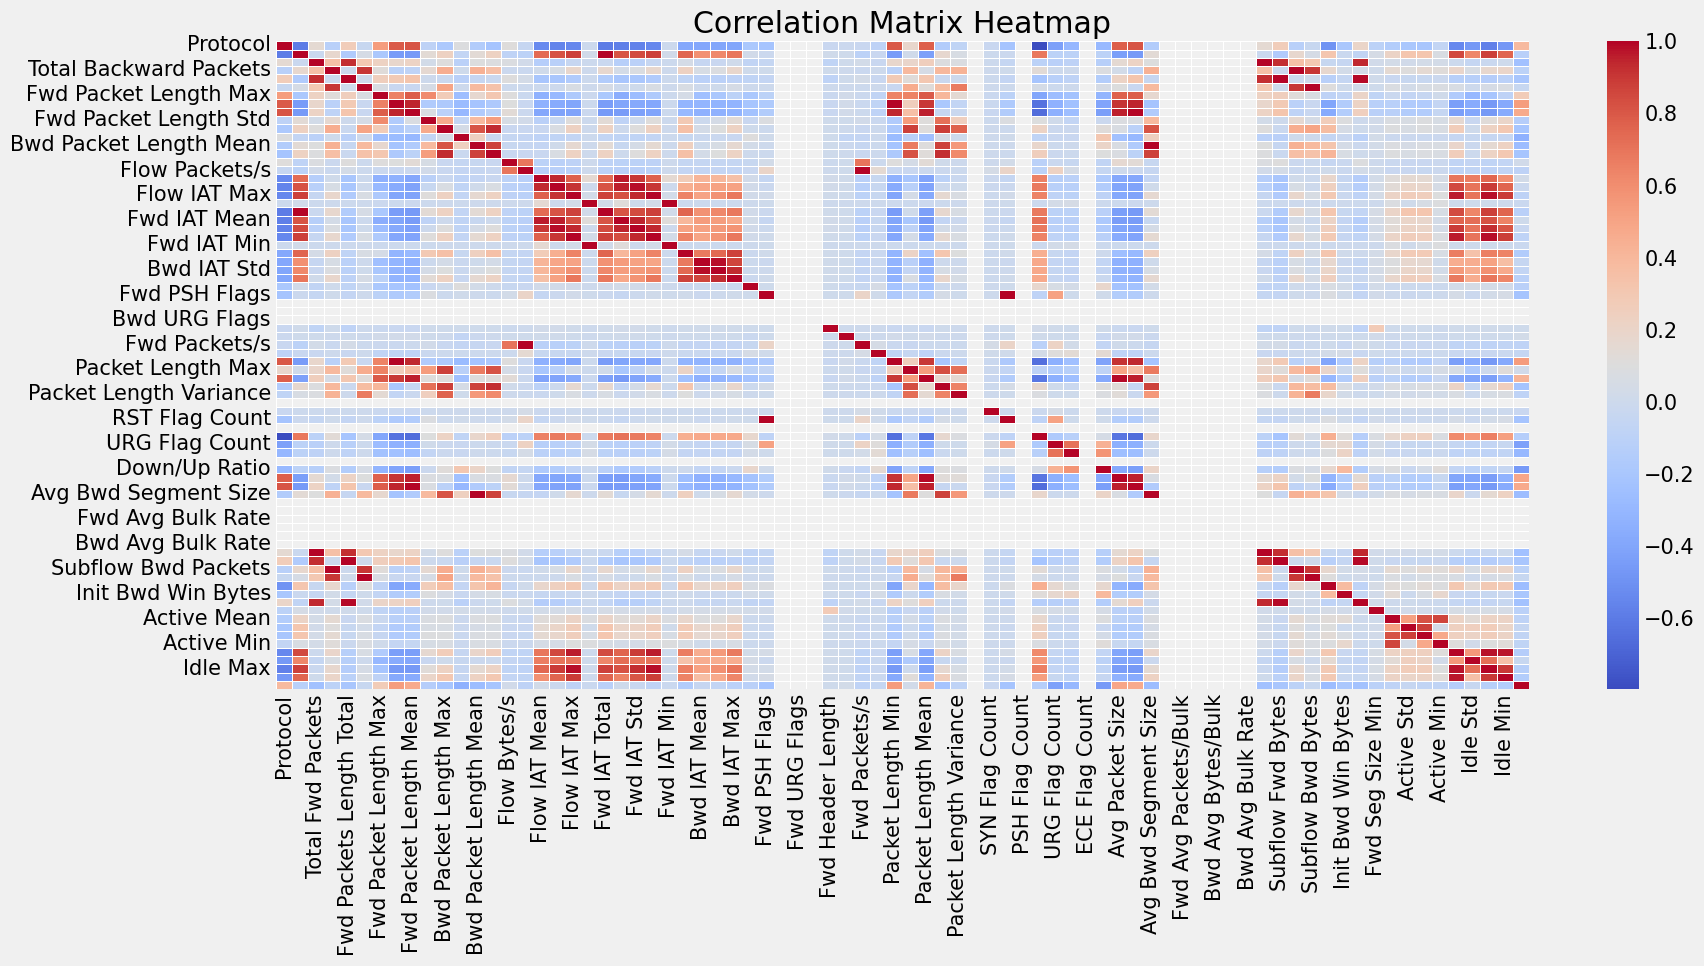

In [12]:
with plt.style.context(style="fivethirtyeight"):
    plt.figure(figsize=(18, 8))
    plt.rcParams['font.size'] = 15
    sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [13]:
target_feature = 'Label'
all_features = df.columns.tolist()
all_features.remove(target_feature)
corr = df[all_features].corrwith(df[target_feature])

In [14]:
corr_df = pd.DataFrame(corr).reset_index()
corr_df.columns = ['Features', 'Importance']
corr_df

,Features,Importance
0,Protocol,0.383063
1,Flow Duration,-0.116884
2,Total Fwd Packets,-0.239748
3,Total Backward Packets,-0.096359
4,Fwd Packets Length Total,-0.207446
5,Bwd Packets Length Total,-0.036474
6,Fwd Packet Length Max,0.271981
7,Fwd Packet Length Min,0.534206
8,Fwd Packet Length Mean,0.472019
9,Fwd Packet Length Std,-0.139985


In [15]:
corr_df = corr_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
corr_df = corr_df.dropna()
corr_df = corr_df.loc[corr_df['Importance'] >= 0]
corr_df

,Features,Importance
0,Packet Length Min,0.538753
1,Fwd Packet Length Min,0.534206
2,Avg Packet Size,0.493691
3,Fwd Packet Length Mean,0.472019
4,Avg Fwd Segment Size,0.472019
5,Packet Length Mean,0.418382
6,Protocol,0.383063
7,Fwd Packet Length Max,0.271981
8,Bwd Header Length,0.029930
9,Flow IAT Mean,0.028533


In [16]:
with open(file="models/selected_features.pkl", mode="wb") as file:
    pickle.dump(obj=corr_df['Features'].values.tolist(), file=file)

In [17]:
df.shape

(90000, 78)

In [18]:
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,17,108937,4,0,1398.0,0.0,369.0,330.0,349.5,22.51666,0.0,0.0,0.0,0.0,1.283311e+04,36.718470,3.631233e+04,6.285238e+04,108888.0,1.0,108937.0,3.631233e+04,6.285238e+04,108888.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,80,0,36.718470,0.000000,330.0,369.0,345.6,21.36118,456.3,0,0,0,0,0,0,0,0,0.0,432.000000,349.5,0.0,0,0,0,0,0,0,4,1398,0,0,-1,-1,3,20,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,4
1,17,2998434,4,0,2064.0,0.0,516.0,516.0,516.0,0.00000,0.0,0.0,0.0,0.0,6.883593e+02,1.334030,9.994780e+05,1.731146e+06,2998433.0,0.0,2998434.0,9.994780e+05,1.731146e+06,2998433.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,80,0,1.334030,0.000000,516.0,516.0,516.0,0.00000,0.0,0,0,0,0,0,0,0,0,0.0,645.000000,516.0,0.0,0,0,0,0,0,0,4,2064,0,0,-1,-1,3,20,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,3
2,17,3005015,4,0,2064.0,0.0,516.0,516.0,516.0,0.00000,0.0,0.0,0.0,0.0,6.868518e+02,1.331108,1.001672e+06,1.734944e+06,3005012.0,1.0,3005015.0,1.001672e+06,1.734944e+06,3005012.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,1.331108,0.000000,516.0,516.0,516.0,0.00000,0.0,0,0,0,0,0,0,0,0,0.0,645.000000,516.0,0.0,0,0,0,0,0,0,4,2064,0,0,-1,-1,3,-1,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,3
3,17,942,18,0,7920.0,0.0,440.0,440.0,440.0,0.00000,0.0,0.0,0.0,0.0,8.407643e+06,19108.280255,5.541177e+01,7.773759e+01,256.0,0.0,942.0,5.541177e+01,7.773759e+01,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-18,0,19108.280000,0.000000,440.0,440.0,440.0,0.00000,0.0,0,0,0,0,0,0,0,0,0.0,464.444460,440.0,0.0,0,0,0,0,0,0,18,7920,0,0,-1,-1,17,-1,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,6,59833134,10,4,60.0,24.0,6.0,6.0,6.0,0.00000,6.0,6.0,6.0,0.0,1.403904e+00,0.233984,4.602549e+06,7.548023e+06,21785732.0,1.0,59833136.0,6.648126e+06,8.376194e+06,21785838.0,1.0,13709210.0,4569736.5,7915013.5,13709207.0,1.0,0,0,0,0,200,80,0.167131,0.066853,6.0,6.0,6.0,0.00000,0.0,0,0,0,0,1,0,0,0,0.0,6.428571,6.0,6.0,0,0,0,0,0,0,10,60,4,24,5840,0,9,20,45.25,53.05579,107.0,1.0,14958227.0,4621059.0,21785732.0,11763907.0,2


In [19]:
X=df.drop(labels='Label',axis=1)
X.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,17,108937,4,0,1398.0,0.0,369.0,330.0,349.5,22.51666,0.0,0.0,0.0,0.0,1.283311e+04,36.718470,3.631233e+04,6.285238e+04,108888.0,1.0,108937.0,3.631233e+04,6.285238e+04,108888.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,80,0,36.718470,0.000000,330.0,369.0,345.6,21.36118,456.3,0,0,0,0,0,0,0,0,0.0,432.000000,349.5,0.0,0,0,0,0,0,0,4,1398,0,0,-1,-1,3,20,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
1,17,2998434,4,0,2064.0,0.0,516.0,516.0,516.0,0.00000,0.0,0.0,0.0,0.0,6.883593e+02,1.334030,9.994780e+05,1.731146e+06,2998433.0,0.0,2998434.0,9.994780e+05,1.731146e+06,2998433.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,80,0,1.334030,0.000000,516.0,516.0,516.0,0.00000,0.0,0,0,0,0,0,0,0,0,0.0,645.000000,516.0,0.0,0,0,0,0,0,0,4,2064,0,0,-1,-1,3,20,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
2,17,3005015,4,0,2064.0,0.0,516.0,516.0,516.0,0.00000,0.0,0.0,0.0,0.0,6.868518e+02,1.331108,1.001672e+06,1.734944e+06,3005012.0,1.0,3005015.0,1.001672e+06,1.734944e+06,3005012.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,1.331108,0.000000,516.0,516.0,516.0,0.00000,0.0,0,0,0,0,0,0,0,0,0.0,645.000000,516.0,0.0,0,0,0,0,0,0,4,2064,0,0,-1,-1,3,-1,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
3,17,942,18,0,7920.0,0.0,440.0,440.0,440.0,0.00000,0.0,0.0,0.0,0.0,8.407643e+06,19108.280255,5.541177e+01,7.773759e+01,256.0,0.0,942.0,5.541177e+01,7.773759e+01,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-18,0,19108.280000,0.000000,440.0,440.0,440.0,0.00000,0.0,0,0,0,0,0,0,0,0,0.0,464.444460,440.0,0.0,0,0,0,0,0,0,18,7920,0,0,-1,-1,17,-1,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0
4,6,59833134,10,4,60.0,24.0,6.0,6.0,6.0,0.00000,6.0,6.0,6.0,0.0,1.403904e+00,0.233984,4.602549e+06,7.548023e+06,21785732.0,1.0,59833136.0,6.648126e+06,8.376194e+06,21785838.0,1.0,13709210.0,4569736.5,7915013.5,13709207.0,1.0,0,0,0,0,200,80,0.167131,0.066853,6.0,6.0,6.0,0.00000,0.0,0,0,0,0,1,0,0,0,0.0,6.428571,6.0,6.0,0,0,0,0,0,0,10,60,4,24,5840,0,9,20,45.25,53.05579,107.0,1.0,14958227.0,4621059.0,21785732.0,11763907.0


In [20]:
X.shape

(90000, 77)

In [21]:
y=df[['Label']]
y.head()

,Label
0,4
1,3
2,3
3,1
4,2


In [22]:
y.shape

(90000, 1)

## Data Normalization

In [23]:
scaler = MinMaxScaler()
scaler = scaler.fit(X.values)
scaled_X = scaler.transform(X.values)

df = pd.DataFrame(data=scaled_X,columns=X.columns)
df['Label'] = y.values.ravel()

df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,1.000000,0.000908,0.001026,0.000000,0.010092,0.000000,0.104149,0.156102,0.131091,0.016893,0.000000,0.00000,0.000000,0.0,6.591220e-06,9.171135e-06,0.000924,0.000923,0.000908,2.569894e-08,0.000908,0.000933,0.000972,0.000908,2.569894e-08,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,9.177497e-06,0.000000e+00,0.224185,0.009721,0.096926,0.003414,0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121084,0.131091,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001026,0.010092,0.000000,0.000000,0.000000,0.000000,0.005650,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,4
1,1.000000,0.024988,0.001026,0.000000,0.014900,0.000000,0.145639,0.244087,0.193542,0.000000,0.000000,0.00000,0.000000,0.0,3.535487e-07,3.250244e-07,0.025436,0.025436,0.025001,0.000000e+00,0.024988,0.025686,0.026767,0.025001,0.000000e+00,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,3.313867e-07,0.000000e+00,0.350543,0.013593,0.144716,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180785,0.193542,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001026,0.014900,0.000000,0.000000,0.000000,0.000000,0.005650,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3
2,1.000000,0.025043,0.001026,0.000000,0.014900,0.000000,0.145639,0.244087,0.193542,0.000000,0.000000,0.00000,0.000000,0.0,3.527744e-07,3.242940e-07,0.025492,0.025492,0.025056,2.569894e-08,0.025043,0.025742,0.026826,0.025056,2.569894e-08,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,3.306563e-07,0.000000e+00,0.350543,0.013593,0.144716,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.180785,0.193542,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001026,0.014900,0.000000,0.000000,0.000000,0.000000,0.005650,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3
3,1.000000,0.000008,0.005816,0.000000,0.057176,0.000000,0.124189,0.208136,0.165036,0.000000,0.000000,0.00000,0.000000,0.0,4.318255e-03,4.777062e-03,0.000001,0.000001,0.000002,0.000000e+00,0.000008,0.000001,0.000001,0.000002,0.000000e+00,0.00000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,4.777068e-03,0.000000e+00,0.298913,0.011591,0.123401,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.130178,0.165036,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.005816,0.057176,0.000000,0.000000,0.000000,0.000000,0.032015,0.999999,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1
4,0.352941,0.498626,0.003079,0.000869,0.000433,0.000003,0.001693,0.002838,0.002250,0.000000,0.000158,0.00411,0.001315,0.0,7.210603e-10,5.001299e-08,0.117131,0.110904,0.181649,2.569894e-08,0.498627,0.170850,0.129512,0.181650,2.569894e-08,0.11435,0.07753,0.094955,0.1162

In [24]:
with open(file='models/scaler.pkl',mode='wb') as file:
    pickle.dump(obj=scaler,file=file)

## Data Splitting

In [25]:
X = df.drop(labels='Label', axis=1)
y = df[['Label']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(72000, 77) (18000, 77) (72000, 1) (18000, 1)


In [26]:
X_train.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
51004,1.000000,0.000006,0.023606,0.000000,0.219232,0.000000,0.124189,0.105960,0.162721,0.027193,0.000000,0.00000,0.000000,0.0,2.074113e-02,2.327127e-02,2.688749e-07,3.405434e-07,9.505296e-07,0.000000e+00,0.000006,2.800813e-07,3.583638e-07,9.588676e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,2.327128e-02,0.000000e+00,0.152174,0.011591,0.121695,0.005752,3.308514e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123358,0.162721,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.023606,0.219232,0.000000,0.000000,0.000000,0.000000,0.129944,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11453,0.352941,0.011402,0.001026,0.000435,0.000029,0.000000,0.000282,0.000473,0.000375,0.000000,0.000000,0.00000,0.000000,0.0,1.501508e-09,1.087805e-06,6.964144e-03,6.485228e-03,8.454702e-03,0.000000e+00,0.008450,8.686252e-03,9.051928e-03,8.454711e-03,0.000000e+00,8.341075e-09,1.696607e-08,0.000000,8.483035e-09,0.004016,0.0,0.0,0.0,0.0,1.0,0.999965,7.287382e-07,7.308590e-07,0.000000,0.000026,0.000200,0.000078,6.080699e-09,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000234,0.000375,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001026,0.000029,0.000435,0.000000,0.980240,0.474380,0.005650,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9691,1.000000,0.000908,0.001026,0.000000,0.010381,0.000000,0.109794,0.156102,0.134842,0.025556,0.000000,0.00000,0.000000,0.0,6.779872e-06,9.171219e-06,9.240980e-04,9.240704e-04,9.082727e-04,2.569894e-08,0.000908,9.331801e-04,9.724266e-04,9.082811e-04,2.569894e-08,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,9.177581e-06,0.000000e+00,0.224185,0.010248,0.099170,0.005164,2.667031e-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123887,0.134842,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001026,0.010381,0.000000,0.000000,0.000000,0.000000,0.005650,0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
51992,0.352941,0.311945,0.003079,0.001738,0.000433,0.000005,0.001693,0.002838,0.002250,0.000000,0.000158,0.00411,0.001315,0.0,1.481879e-09,1.117344e-07,5.603610e-02,6.090439e-02,9.167900e-02,0.000000e+00,0.311945,1.068853e-01,7.762896e-02,9.167984e-02,0.000000e+00,2.443000e-01,7.098793e-02,0.063571,9.327439e-02,0.004016,0.0,0.0,0.0,0.0,1.0,0.999965,6.466671e-08,1.068599e-07,0.004076,0.000158,0.001683,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.001775,0.002250,0.001315,0.0,0.0,0.0,0.0,0.0,0.0,0.003079,0.000433,0.001738,0.000005,0.089127,0.000015,0.016949,0.999999,0.000009,0.000004,0.000005,0.000005,0.079664,0.022019,0.093603,0.067787
23531,1.000000,0.025019,0.001026,0.000000,0.014900,0.000000,0.145639,0.244087,0.193542,0.000000,0.000000,0.00000,0.

In [27]:
X_test.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Avg Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init Fwd Win Bytes,Init Bwd Win Bytes,Fwd Act Data Packets,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
89610,1.000000,0.001799,0.001711,0.000000,0.015074,0.000000,0.110923,0.151845,0.130528,0.026325,0.000000,0.0,0.000000,0.000000,0.000005,0.000007,1.098602e-03,8.688812e-04,9.200376e-04,0.000000e+00,0.001799,1.109398e-03,9.143494e-04,9.200460e-04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,0.000007,0.000000,0.218071,0.010353,0.096517,0.005372,0.000029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.112535,0.130528,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001711,0.015074,0.000000,0.000000,0.000000,0.000000,0.009416,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12456,0.352941,0.011657,0.009237,0.008909,0.018120,0.000234,0.102173,0.000000,0.033623,0.067377,0.006876,0.0,0.011044,0.009552,0.000002,0.000012,5.234897e-04,8.340758e-04,3.459236e-03,5.139789e-08,0.011210,1.280280e-03,1.514515e-03,3.903433e-03,5.139789e-08,0.011225,0.000571,0.000853,0.003519,0.008032,0.0,0.0,0.0,0.0,1.0,0.999966,0.000005,0.000015,0.000000,0.009536,0.018334,0.012382,0.000153,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.076923,0.018588,0.033623,0.011044,0.0,0.0,0.0,0.0,0.0,0.0,0.009237,0.018120,0.008909,0.000234,0.125015,0.003769,0.045198,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53403,0.352941,0.000003,0.001026,0.000000,0.000888,0.000000,0.012983,0.000000,0.011534,0.016269,0.000000,0.0,0.000000,0.000000,0.000206,0.003257,2.595805e-06,2.540681e-06,2.509732e-06,5.139789e-08,0.000003,2.629859e-06,2.673634e-06,2.518070e-06,5.139789e-08,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.999965,0.003257,0.000000,0.000000,0.001212,0.009479,0.003193,0.000010,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.011842,0.011534,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001026,0.000888,0.000000,0.000000,0.003891,0.000000,0.003766,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62905,1.000000,0.000004,0.008553,0.000000,0.077390,0.000000,0.124189,0.037843,0.154649,0.073396,0.000000,0.0,0.000000,0.000000,0.012657,0.014943,4.343307e-07,5.190103e-07,9.255157e-07,0.000000e+00,0.000004,4.471616e-07,5.461699e-07,9.338536e-07,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,0.014943,0.000000,0.054348,0.011591,0.115922,0.015354,0.000236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.120308,0.154649,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.008553,0.077390,0.000000,0.000000,0.000000,0.000000,0.047081,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66339,1.000000,0.000002,0.002395,0.000000,0.020214,0.000000,0.124189,0.037843,0.131279,0.125027,0.000000,0.0,0.000000,0.000000,0.005531,0.007692,9.367680e-07,9.109076e-07,1.242359e-06,2.569894e-08,0.000002,9.545322e-07,9.585749e-07,1.250697e-06,2.569894e-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.999965,0.007692,0.000000,0.054348,0.011591,0.100964,0

In [28]:
y_train.head()

,Label
51004,1
11453,0
9691,4
51992,2
23531,3


In [29]:
y_test.head()

,Label
89610,4
12456,0
53403,0
62905,1
66339,1


## Saving the splitted data

In [30]:
X_train.to_csv('splitted_data/X_train.csv',index=False)
X_test.to_csv('splitted_data/X_test.csv',index=False)
y_train.to_csv('splitted_data/y_train.csv',index=False)
y_test.to_csv('splitted_data/y_test.csv',index=False)

---